# **Лабораторная работа «Нормы векторов и матриц, решение переопределенной системы линейных уравнений».**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy
from prettytable import PrettyTable

**Задание 1.** Создать квадратную матрицу из случайных вещественных
чисел размера 10 . Найти скалярное произведение 2 строки
на 7 столбец. Использовать срезы матриц.

In [2]:
matrix = np.random.rand(10, 10)
mul = np.dot(matrix[1,:], matrix[:,6])
mul

3.1324088524907987

**Задание 2.** Создать вектор-строку 1x10 из случайных целых чисел.
Вычислить норму $\|x\|_4$ самостоятельно написанной функцией и проверить результат с помощью linalg.norm() в Python.

In [3]:
x = np.array([random.random() for i in range(10)])
x_norm = 0
for i in range(len(x)):
  x_norm += x[i] ** 4
x_norm = x_norm ** 0.25
print("x_norm =", x_norm)
print("x_norm_linalg.norm() =", np.linalg.norm(x, ord=4))

x_norm = 1.255841528349616
x_norm_linalg.norm() = 1.255841528349616


**Задание 3.** Создать матрицу из случайных целых чисел. Найти норму
матрицы $\|A\|_\infty$ с помощью самостоятельно написанного алгоритма, проверить результат с помощью linalg.norm() в Python.

In [5]:
def max_norm(matrix):
    max_sum = np.sum(np.abs(matrix[0]))
    for row in matrix[1:]:
        row_sum = np.sum(np.abs(row))
        if row_sum > max_sum:
            max_sum = row_sum
    return max_sum

matrix = np.random.randint(-10, 10, (10, 10))
print("A_norm =", max_norm(matrix))
print("A_linalg_norm() =", np.linalg.norm(matrix, ord=np.inf))

A_norm = 60
A_linalg_norm() = 60.0


**Задание 4.** Найти псевдорешение системы
\begin{equation*}
 \begin{cases}
   3.3x_1 + 2.1x_2 + 2.8x_3 = 0.8
   \\
   4.1x_1 + 3.7x_2 + 4.8x_3 = 5.7
   \\
   2.7x_1 + 1.8x_2 + 1.1x_3 = 3.2
   \\
   3.15x_1 - 1.72x_2 - 1.23x_3 = 2.15
 \end{cases}
\end{equation*}

In [8]:
A = np.array([[3.3, 2.1, 2.8], [4.1, 3.7, 4.8], [2.7, 1.8, 1.1], [3.15, -1.72, -1.23]])
B = np.array([0.8, 5.7, 3.2, 2.15])
X = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(), A)), A.transpose()), B)

C = A @ X - B

norm = 0
for i in range(len(C)):
  norm += C[i] * C[i]
norm = norm ** 0.5

print("norm =", norm)
print("linalg_norm() =", np.linalg.norm((C), ord=2))

norm = 2.8091700100243915
linalg_norm() = 2.8091700100243915


**Задание 5.** Даны пять точек: $ (-4, \ 7), \ (-2, \ 1),\ (0, \ -3), \ (4, \ -8), \ (6, \ -9). $ Найти уравнение наиболее выгодной траектории. Построить график.

Система уравнений:
\begin{equation*}
 \begin{cases}
   -4a + b = 7
   \\
   -2a + b = 1
   \\
   0a + b = -3
   \\
   4a + b = -8
   \\
   6a + b = -9
 \end{cases}
\end{equation*}

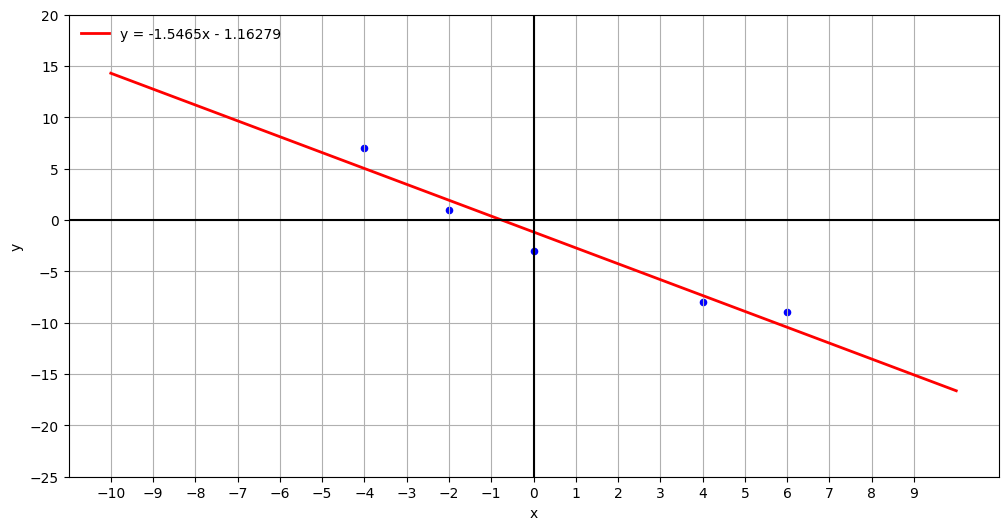

-1.5465116279069766
-1.162790697674419


In [9]:
dots = np.array([[-4, 7], [-2, 1], [0, -3], [4, -8], [6, -9]])
A = np.array([[-4, 1], [-2, 1], [0, 1], [4, 1], [6, 1]])
B = np.array([7, 1, -3, -8, -9])
#X = (A^T * A) ^ -1 * A^T * B
X = np.linalg.inv(A.transpose() @ A) @ A.transpose() @ B
x = np.linspace(-10, 10, 10000)
y = X[0] * x + X[1]

plt.figure(figsize=(12, 6))

plt.plot(x, y, color='r', linewidth='2', label='y = -1.5465x - 1.16279')

for i in range(5):
  plt.scatter(dots[i][0], dots[i][1], color='blue', s=20, marker='o')

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.xticks([i for i in range(-10, 10, 1)])
plt.yticks([i for i in range(-25, 25, 5)])

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='upper left', frameon=False)

plt.grid()
plt.show()
print(X[0])
print(X[1])

**Задание 6.**
Решить систему, используя LU разложение матрицы. LU разложение должно быть найдено самостоятельно написанной функцией, полученные матрицы выведены на экран. Придерживаться плана решения, приведенного в пособии! Решение системы должно быть проверено встроенной функцией Python.
\begin{equation*}
 \begin{cases}
   3.8x_1 + 14.2x_2 + 6.3x_3 - 15.5x_4 = 2.8
   \\
   8.3x_1 - 6.6x_2 + 5.8x_3 + 12.2x_4 = -4.7
   \\
   6.4x_1 - 8.5x_2 - 4.3x_3 + 8.8x_4 = 7.7
   \\
   17.1x_1 - 8.3x_2 + 14.4x_3 - 7.2x_4 = 13.5
   \\
 \end{cases}
\end{equation*}

In [10]:
A = np.array([[3.8, 14.2, 6.3, -15.5], [8.3, -6.6, 5.8, 12.2], [6.4, -8.5, -4.3, 8.8], [17.1, -8.3, 14.4, -7.2]])
B = np.array([2.8, -4.7, 7.7, 13.5])

#LU-разложение
U = np.zeros((4, 4), float)
L = np.identity(4, float)
for i in range(4):
  for j in range(4):
    if i <= j:
      U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
    else:
      L[i, j] = (A[i, j] - np.dot(L[i, :j], U[:j, j])) / U[j, j]

#LY = B (метод прямой подстановки)
Y = np.zeros((4, 1), float)
Y[0] = B[0]
for i in range(1, 4):
  Y[i] = B[i] - np.dot(L[i, :i], Y[:i])

#UX = Y (метод обратной подстановки)
X = np.zeros(np.size(B), float)
X[-1] = Y[-1] / U[-1, -1]
for i in range(2, -1, -1):
  X[i] = (Y[i] - np.sum(U[i, i + 1:] * X[i + 1:])) / U[i, i]

#NumPy Solve
X_linalg_solve = np.linalg.solve(A, B)

print(X)
print(X_linalg_solve)

[ 0.97086337 -0.58975751 -1.0000204  -0.88938092]
[ 0.97086337 -0.58975751 -1.0000204  -0.88938092]


<ipython-input-10-91ac1b225ad3>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[-1] = Y[-1] / U[-1, -1]
<ipython-input-10-91ac1b225ad3>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i] = (Y[i] - np.sum(U[i, i + 1:] * X[i + 1:])) / U[i, i]


**Задание 7.** Решить систему из пункта 2 с помощью QR разложения
матрицы А. QR разложение найти методом Хаусхолдера.
Придерживаться плана решения, приведенного в пособии!
Проверить полученное решение непосредственной
подстановкой в исходную систему, а также методом
np.solve.

In [11]:
A = np.array([[3.8, 14.2, 6.3, -15.5], [8.3, -6.6, 5.8, 12.2], [6.4, -8.5, -4.3, 8.8], [17.1, -8.3, 14.4, -7.2]])
B = np.array([2.8, -4.7, 7.7, 13.5])

#QR разложение (метод Хаусхолдера)
(r, c) = np.shape(A)
Q = np.identity(r)
R = np.copy(A)
for i in range(r - 1):
  x = R[i:, i]
  e = np.zeros_like(x)
  e[0] = np.linalg.norm(x)
  u = x - e
  v = u / np.linalg.norm(u)
  Q_i = np.identity(r)
  Q_i[i:, i:] -= 2.0 * np.outer(v, v)
  R = np.dot(Q_i, R)
  Q = np.dot(Q, Q_i)

#RX = Y
Y = np.dot(Q.transpose(), B)

#RX = Y (метод обратной подстановки)
X = np.zeros(np.size(Y), float)
X[-1] = Y[-1] / R[-1, -1]
for i in range(2, -1, -1):
  X[i] = (Y[i] - np.sum(R[i, i + 1:] * X[i + 1:])) / R[i, i]

print(X)
print(np.linalg.solve(A, B))


[ 0.97086337 -0.58975751 -1.0000204  -0.88938092]
[ 0.97086337 -0.58975751 -1.0000204  -0.88938092]


**Задание 8.** Решить систему методом простых итераций с точностью
до $ 10^{-3} $. Проверить выполнение достаточного условия
сходимости. Если условие не выполняется, в программе
выполнить эквивалентные преобразования системы, после
этого привести к удобному для итераций виду. Оформить
итерации в виде таблицы (можно пользоваться модулями
PrettyTable или Pandas). Проверить полученное решение.
\begin{equation*}
 \begin{cases}
   7.3x_1 + 2.1x_2 + 2.8x_3 = 0.8
   \\
   8.3x_1 + 8.7x_2 + 4.8x_3 = 5.7
   \\
   2.7x_1 + 1.8x_2 + 9.1x_3 = 3.2
   \\
 \end{cases}
\end{equation*}

In [12]:
# С учетом диагонального преобладания: 2 строка - 1 строка
A = np.array([[7.3, 2.1, 2.8], [1, 6.6, 2], [2.7, 1.8, 9.1]])
B = np.array([0.8, 4.9, 3.2])

def Jacobi(A, B):
  iter_list = []
  x1_list = []
  x2_list = []
  x3_list = []
  norm_list = []
  num = len(B)
  x = np.ones((3,), dtype=float)
  for i in range(20):
    iter_list.append(i)
    x_prev = copy.deepcopy(x)
    for k in range(0, num):
      s = 0
      for j in range(0, num):
        if j != k:
          s += A[k][j] * x[j]
        x[k] = B[k] / A[k][k] - s / A[k][k]
      if k == 0:
        x1_list.append(x[k])
      elif k == 1:
        x2_list.append(x[k])
      elif k == 2:
        x3_list.append(x[k])

    x_old = x_prev
    x_new = x
    eps = 0.001

    norm = np.linalg.norm((x_new - x_old), ord=np.inf)
    norm_list.append(norm)
    if norm < eps:
      break

  result_table = PrettyTable()
  result_table.add_column('k', iter_list)
  result_table.add_column('x1', x1_list)
  result_table.add_column('x2', x2_list)
  result_table.add_column('x3', x3_list)
  result_table.add_column('norm', norm_list)

  print(result_table)

Jacobi(A, B)
print(np.linalg.solve(A, B))

+---+----------------------+--------------------+---------------------+------------------------+
| k |          x1          |         x2         |          x3         |          norm          |
+---+----------------------+--------------------+---------------------+------------------------+
| 0 | -0.5616438356164384  | 0.524491490244915  |  0.4145443597498392 |   1.5616438356164384   |
| 1 | -0.20029538860463997 | 0.647152525621964  |  0.2830684618805487 |   0.3613484470117984   |
| 2 | -0.18515232836598094 | 0.6846993037280128 | 0.27114863075579404 |  0.037546778106048784  |
| 3 | -0.1913814662938425  | 0.689255182542766  |  0.2720956736721315 |  0.006229137927861561  |
| 4 | -0.19305531090709271 | 0.6892218126610349 |  0.2725989095229987 | 0.0016738446132502083  |
| 5 | -0.19323873332226982 | 0.6890971082236778 |  0.2726779983700559 | 0.00018342241517710356 |
+---+----------------------+--------------------+---------------------+------------------------+
[-0.19322619  0.68907079  0.27